# Lesson 9 - CSCI 3022
## Probability Intuition and Random Simulation 
***

In this notebook you'll see how we can use Numpy to run probability simulations to estimate probabilities and to gain intuition about random processes and to check your pencil and paper work. 

We'll need Numpy and Matplotlib for this notebook, so let's load and setup those libraries. 

In [2]:
import numpy as np 
import matplotlib.pylab as plt
%matplotlib inline

### Estimating Simple Probabilities 
*** 

In this example we'll see how we can use the Numpy function [np.random.choice](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) to make random draws from a sample space and estimate the probability of certain random events. 

In [18]:
select_from = ["A", "B", "C", "D", "E", "F"]

We can simulate randomly selecting from this arry using `np.random.choice`, which returns a randomly selected entry from a Numpy array.  
If no optional parameters are passed in, `np.random.choice` assigns an **equal probability** to each entry of the array.   

In [21]:
np.random.choice(select_from)

'B'

We can simulate repeatedly selecting (with replacement) by specifying the size of an array:

In [26]:
np.random.choice(select_from,size=4)  #This assumes you are rolling WITH replacement

array(['D', 'A', 'D', 'F'], dtype='<U1')

In [27]:
np.random.choice(select_from, size=4, replace=False) #Selects WITHOUT replacement

array(['A', 'E', 'F', 'D'], dtype='<U1')

**Simulating Coin Tosses**

As a simple example, consider a fair coin.  We can represent the sample space for this coin with a Numpy array with two entries: "H" and "T"

In [3]:
coin = ["H","T"]
coin

['H', 'T']

We can simulate flipping the coin using `np.random.choice` (https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html), which returns a randomly selected entry from a Numpy array.  
If no optional parameters are passed in, `np.random.choice` assigns an **equal probability** to each entry of the array.   

In [8]:

np.random.choice(coin)

'T'

We can simulate many flips of the coin and store the results in an array by passing the size parameter to np.random.choice. 

In [29]:
flips = np.random.choice(coin, size=10)
print(flips)

['T' 'H' 'T' 'T' 'T' 'T' 'H' 'T' 'T' 'H']


We can also count the number of times we get heads:

In [30]:
flips = np.random.choice(coin, size=10)
print(flips)
sum(flips == 'H')

['T' 'H' 'H' 'T' 'T' 'T' 'H' 'H' 'T' 'H']


5

We can alter the probability with which `np.random.choice` selects a particular entry of the sample space array by passing in an optional array of probabilities, e.g. p = [0.75, 0.25]:

In [31]:

biased_flips = np.random.choice(coin, p=[0.75, 0.25], size=10)

print(biased_flips)
sum(biased_flips == 'H')

['H' 'H' 'H' 'T' 'H' 'T' 'H' 'T' 'H' 'H']


7

###  Example 1: 
Simulate rolling a 6-sided die, 10 times:

In [ ]:
die = ...
roll =...



**SideNote**: If instead of passing a list/array you pass an int, to `np.random.choice` the random sample is generated as if it were `np.arange(a)`

In [ ]:
np.random.choice(5, size=10)

*** 
### Example 2- Flipping a Fair Coin

Now suppose we want to run a simple simulation to estimate the probability  that the coin comes up Heads (which we expect to be $0.5$ because the coin is fair).  One way to do this is to do a large number of coin flips and then divide the number of flips that come up Heads by the total number of flips. The following code flips the coin 50 times and computes the desired ratio: 

In [28]:
# The seed() method is used to initialize the random number generator.
# The random number generator needs a number to start with (a seed value),
#   to be able to generate a random number.
# By default the random number generator uses the current system time.
# We can use the seed() method to customize the start number of the random number generator
# so that we get the same results each time.

np.random.seed(12345)

flips = np.random.choice(coin, size=50)
approx_prob_heads = ...

print("the probability of heads is approximately {:.3f}".format(approx_prob_heads))

TypeError: unsupported format string passed to ellipsis.__format__

OK, so the simulation estimated that the probability of the coin coming up heads is $0.36$, which is pretty far off from the $0.5$ that we expected.  This is likely because we didn't do very many coin flips.  Let's see what happens if we rerun the simulation with $500$ coin flips. 

In [ ]:

flips = np.random.choice(coin, size=500)
approx_prob_heads = np.sum(flips == "H") / len(flips)
print("the probability of heads is approximately {:.3f}".format(approx_prob_heads))

With $500$ coin flips our estimate came out much closer to $0.5$



It's an interesting exercise to make a plot of the running estimate of the probability as the number of coin flips increases.  We'll use the same random sequence of coin flips from the previous simulation.  

We'll be using the Python `range` function (https://docs.python.org/3/library/functions.html#func-range) in the following code, so let's see how it works:


In [ ]:
# Notice how range function works:

for ii in range(5):
    print(ii)

the probability of heads is approximately 0.490


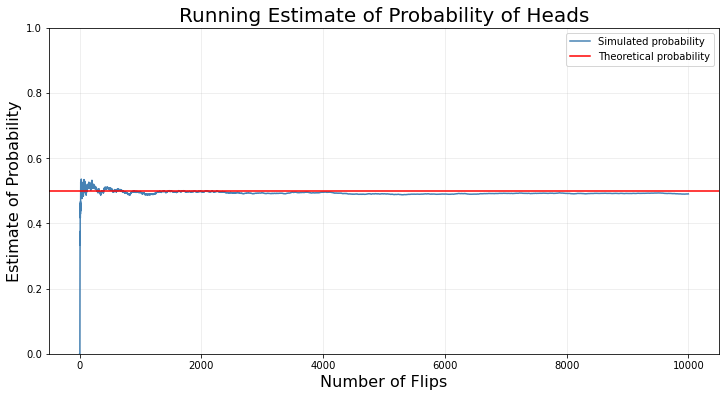

In [32]:

def plot_estimates(n):
    
    flips = np.random.choice(["H","T"], size=n)
    running_prob = []

#Keep a "running estimate" of the probability of getting a heads as num_trials gets larger:    
    for ii in range(n):
        num=np.sum(flips[:(ii+1)] == "H")
        denom=ii+1
        running_prob.append(num/denom)
         # A growing sequence with ratio of 'H' being counted per times coin flipped.
        # Suppose we got T, H, T, ...
        # running_prob[0]=0/1   running_prob[1]=1/2   running_prob[2]=1/3   etc
        # running_prob = [0, 0.5, 0.3333..., etc]
    
    return running_prob



# Run code for num trials
num_trials=10000
p=plot_estimates(num_trials)

print("the probability of heads is approximately {:.3f}".format(p[num_trials-1]))
 
# Plot running estimate of probability of getting heads as num_trials gets larger:
fig, ax = plt.subplots(figsize=(12,6))

# plot the terms in p
ax.plot(p, color="steelblue",label="Simulated probability")

#Plot the theoretical probability
plt.axhline(y = 0.5, color = 'r', linestyle = '-', label = "Theoretical probability")

# put labels on the axes and give the graph a title.
ax.set_title("Running Estimate of Probability of Heads", fontsize=20)
ax.set_xlabel("Number of Flips", fontsize=16)
ax.set_ylabel("Estimate of Probability", fontsize=16)
# fix the y-axis to be between 0 and 1:
ax.set_ylim(0,1)
# include a legend:
ax.legend()
# put a faded grid behind the graphic
ax.grid(True, alpha=0.25)


Notice that for very few flips the estimate of the probability is understandably poor.  But as the number of flips increases the estimate settles down to very close to the expected $0.5$. 

***

### Example 3- Drawing Cards

What's the probability of drawing 2 hearts from a standard 52-card deck?

a).  

P(2 hearts) = 

Let's simulate this now to verify our results.   



In [ ]:
# Create a 52 card deck (use string 'D2' to represent the 2 of Diamonds)


suits=['D','H','C','S']
ranks = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']


# Build a deck
deck = ...

print(deck)


In [ ]:

#Write a function that takes a list of 2 cards as input and returns True if both are hearts. Otherwise it returns False.

def check_two_hearts(twocards):   
       
    #Check if they're both hearts
    return ...
       
    

Test your function:

In [ ]:
assert check_two_hearts(['H7','H8']) == True

assert check_two_hearts(['H7','S7']) == False


Notice: In this scenario we want to draw two cards **WITHOUT REPLACEMENT**


**OPTION 1:** 
`np.random.choice(cards, replace=False, size=2)`


**OPTION 2:** `np.random.shuffle` https://numpy.org/doc/stable/reference/random/generated/numpy.random.shuffle.html
This randomly shuffles the items in a list




 

In [ ]:
print(deck[:5])

np.random.shuffle(deck)

print(deck[:5])

In [ ]:
# Function to simulate a single draw of 2 cards (WITHOUT REPLACEMENT) and check if both draws are hearts.

def single_draw():
    np.random.shuffle(deck)
    first_two = ...
    #print(first_two)
    return check_two_hearts(first_two)
  

out = single_draw()
out

In [ ]:
def probability_of_two_hearts(num_samples=250):
    # simulate random draws   
    
    hearts = np.array([single_draw() for ... in range(...)])
    # compute fraction of draws that resulted in 2 hearts
    #print(hearts)
    return hearts.sum()/num_samples


probability_of_two_hearts()

This is very close to the actual answer we analytically derived in class.

### Example 4 - Estimating the Probability of Drawing Balls from Boxes
***
In class we solved the following problem analytically: 

Suppose we have two boxes filled with green and red balls.  Box 1 contains 2 green balls and 7 red balls.  
Box 2 contains 4 green balls and 3 red balls. 
Paul selects a ball by first choosing one of the two boxes at random. He then selects one of the balls in this box at random. 
What is the probability Paul has selected a red ball, if it is twice as likely for Paul to pick from Box 1 as it is Box 2?



\begin{align*}
P(red) &= P(red|B1)P(B1) + P(red|B2)P(B2) \\
          &= \frac{7}{9} \cdot \frac{2}{3} + \frac{3}{7} \cdot \frac{1}{3} \\
          &= \frac{14}{27}+\frac{1}{7} \\
          &\approx 0.6614
\end{align*}




Python dictionaries are often helpful when representing multiple probabilities like this: 

In [ ]:
#Create dictionaries to represent the distribution of red and green balls in each box: 

box1 = {'balls' : np.array(["green", "red"]), 'probs' : np.array([2/9, 7/9])}
box2 = {'balls' : np.array(["green", "red"]), 'probs' : np.array([4/7, 3/7])}


# Create a dictionary to represent the boxes themselves (and the probability of selecting a specific box)
box_choices = {'boxes' : np.array([box1, box2]), 'probs' : np.array([2/3, 1/3])}

print (box_choices)

print (box_choices['boxes'])

The following code runs a simple simulation to estimate the probability of drawing a ball of a particular color.  Run the code and verify that it agrees with the by-hand computation.

In [ ]:
def sample_ball(box_dict):
    # randomly choose a box
    box = np.random.choice(box_dict['boxes'], p = box_dict['probs'])
    # randomly choose a ball from that box
    return np.random.choice(box['balls'], p = box['probs'])

def probability_of_color(color, box_dict, num_samples=1000):
    # get a bunch of balls
    balls = np.array([sample_ball(box_dict) for ii in range(num_samples)])
    print(balls)
    # compute fraction of balls of desired color 
    
    return np.sum(balls == color) / num_samples

In [ ]:
probability_of_color("red", box_choices, num_samples=50000)

You should find something quite close to what we got in class, which is about 0.661.

### <span style = 'color: Blue' >Example 5- Back to WarmUp: Conditional Probabilities with Dice</span>
***

Suppose you roll a fair die two times.  Let $A$ be the event "the sum of the throws equals 4" and $B$ be the event "at least one of the throws is a $3$"

**Part A**: Compute (by hand) the probability that the sum of the throws equals 4 _given_ that at least one of the throws is a 3.  That is, compute $P(A \mid B)$. 

**Solution**: We want to compute 

$$
P(A \mid B) = \dfrac{P(A \cap B)}{P(B)}
$$

The intersection of the two events is the set $A \cap B = \{(3,1), (1,3)\}$.  Each possible roll combination occurs with probability $\frac{1}{6}\cdot\frac{1}{6} = \frac{1}{36}$. Summing over the possible outcomes gives 

$$
P(A \cap B) = \frac{1}{36} + \frac{1}{36} = \frac{1}{18}
$$

The probability of at least one of the throws being a $3$ can be computed in a number of ways.  Let $E_1$ be the event that we roll a 3 on the first die and $E_2$ be the event that we roll a 3 on the second die. Notice that $E_1$ and $E_2$ are not disjoint because we could roll a 3 on _both_ dice.  So we have 

$$
P(B) = P(E_1 \cup E_2) = P(E_1) + P(E_2) - P(E_1 \cap E_2) = \frac{1}{6} + \frac{1}{6} - \frac{1}{6}\cdot\frac{1}{6} = \frac{11}{36}
$$

Plugging this into the definition of conditional probability gives 

$$
P(A \mid B) = \dfrac{P(A \cap B)}{P(B)} = \frac{1/18}{11/36} = \frac{2}{11} = 0.\overline{18}
$$

***

Let's see if we can write a simple simulation to confirm our result.  

The following code runs a simulation to **estimate $P(A)$, i.e. the probability that if you roll a fair six-sided die twice the result will sum to 4**  

In [ ]:
def simulateA(num_samples):
    die = np.array([1,2,3,4,5,6])
    
    roll1 = np.random.choice(die, size=num_samples)
    print("Roll 1 is ", roll1)

    roll2 = np.random.choice(die, size=num_samples)
    print("Roll 2 is ", roll2)

    #Make a boolean array that is True if roll1 and roll2 sum to 4:
    sum_to_four = (roll1 + roll2) == 4
    print("Event A:  Sum to four?", sum_to_four)


    #Calculate the proportion of samples (out of your num_samples) where the two die sum to 4
    return np.sum(sum_to_four)/num_samples


simulateA(15)

**Part B**: Modify the code above so that it estimates the conditional probability $P(A \mid B)$. **Hint**: Think about the definition of conditional probability.

*Hint:  the Numpy methods `logical_or` and `logical_and` are potentially useful.*

In [ ]:
def simulateA_given_B(num_samples):
    
    ...
    
print(simulateA_given_B(10000))

## Example 6:  Simulating Probablity Distributions


Let's revisit our original coin flip example.  Suppose we want to run a simple simulation to estimate the number of times the coin comes up Heads out of 100 tosses (which we expect to be around $50$ because the coin is fair).  

In [19]:
#Simulate one experiment 
def heads_in_n_tosses(n=100):
    return sum(np.random.choice(["H","T"],size=n,p=[.26, .74]) == 'H')

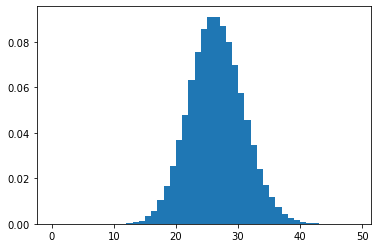

In [32]:
# Repeat the experiment m times:
num_simulations = 50000;

outcomes=[]

for i in np.arange(num_simulations):
    outcomes = np.append(outcomes, heads_in_n_tosses())

plt.hist(outcomes,bins=np.arange(0,50),   density=True);

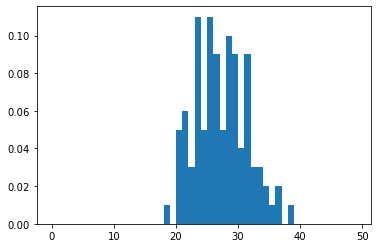

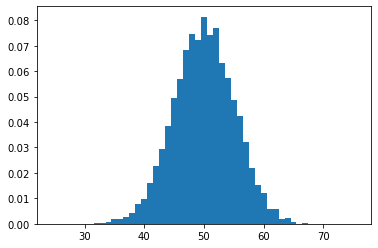

In [15]:
plt.hist(outcomes,  bins=np.arange(24.5, 76.5), density=True);

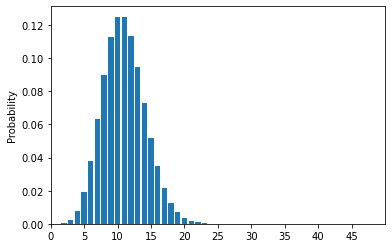

In [42]:
from scipy.stats import poisson


# creating a numpy array for x-axis
x = np.arange(0, 100)
#print(x)
 
# poisson distribution data for y-axis
pmf = poisson.pmf(x, mu=10, loc=0)
#print(pmf)
 
plt.bar(range(1,len(pmf)+1), pmf)
plt.xticks(range(0,50,5))
plt.xlim([0,50])
plt.xlabel('')
plt.ylabel('Probability')
plt.show()

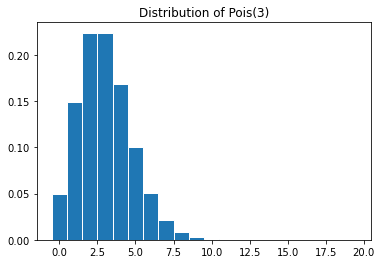

In [8]:
from scipy.stats import poisson

x = np.arange(0, 20)
fig, ax = plt.subplots(1, 1)
mu = 3
p=poisson.pmf(x, mu)


ax.bar(x, p, width=1, ec='white');

plt.title("Distribution of Pois(3)");

# END SOLUTION

# your code above this line